Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.decomposition import PCA as sklearn_pca
import locale
from locale import atof
import warnings
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import f_regression
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import xlrd
from sklearn import ensemble
import time
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [38]:
# Read and import data
airlines = pd.read_csv('Airlines 2008.csv')
airlines.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [39]:
airlines.fillna(method='bfill')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,A,0,2.0,0.0,0.0,0.0,32.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,A,0,2.0,0.0,0.0,0.0,32.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,A,0,2.0,0.0,0.0,0.0,32.0
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,A,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,A,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,A,0,10.0,0.0,0.0,0.0,47.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,A,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,7.0,0,A,0,8.0,0.0,0.0,0.0,72.0
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,6.0,19.0,0,A,0,8.0,0.0,0.0,0.0,72.0
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,3.0,6.0,0,A,0,8.0,0.0,0.0,0.0,72.0


In [40]:
#airlines.loc[airlines['ArrDelay'] <= 30, 'ArrDelay'] = 0
#airlines.loc[airlines['ArrDelay'] > 30, 'ArrDelay'] = airlines['ArrDelay'] - 30

In [41]:
len(airlines)

7009728

In [42]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


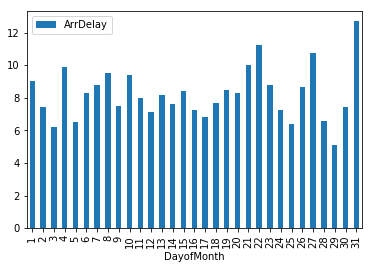

In [44]:
# Compute average number of delayed flights per month
grouped = airlines[['ArrDelay', 'DayofMonth']].groupby('DayofMonth').mean()

# plot average delays by month
grouped.plot(kind='bar')

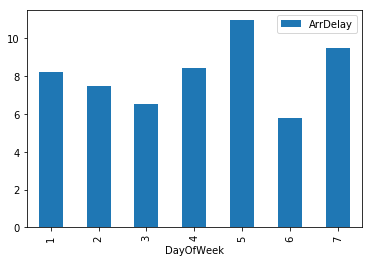

In [45]:
# Compute average number of delayed flights per month
grouped = airlines[['ArrDelay', 'DayOfWeek']].groupby('DayOfWeek').mean()

# plot average delays by month
grouped.plot(kind='bar')

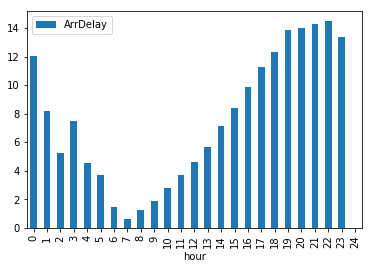

In [46]:
# Compute average number of delayed flights per month
airlines['hour'] = airlines['CRSArrTime'].map(lambda x: int(str(int(x)).zfill(4)[:2]))
grouped = airlines[['ArrDelay', 'hour' ]].groupby('hour').mean()

# plot average delays by month
grouped.plot(kind='bar')

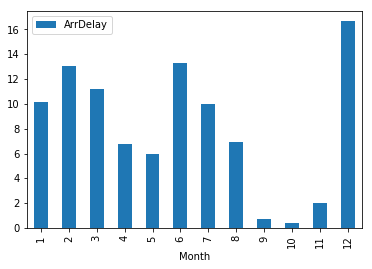

In [47]:
# Compute average number of delayed flights per month
grouped = airlines[['ArrDelay', 'Month']].groupby('Month').mean()

# plot average delays by month
grouped.plot(kind='bar')

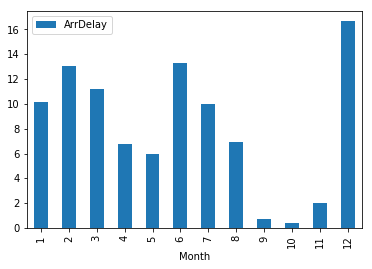

In [48]:
# Compute average number of delayed flights per month
grouped = airlines[['ArrDelay', 'Month']].groupby('Month').mean()

# plot average delays by month
grouped.plot(kind='bar')

In [49]:

airlines.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
hour                       0
dtype: int64

In [52]:
#Drop columns that are not going to be used
airlines1 = airlines.drop(airlines[['Year','Month','UniqueCarrier','FlightNum',
                                    'TailNum','Origin','Dest',
                                    'CancellationCode',
                                   'CarrierDelay',
                                   'WeatherDelay',
                                   'NASDelay',
                                   'SecurityDelay',
                                   'LateAircraftDelay']],axis=1)

In [ ]:
airlines2=airlines1.drop(airlines1[['DepTime','ActualElapsedTime',
                                    'CRSElapsedTime','AirTime',
                                    'DepDelay','TaxiIn','TaxiOut','AirTime','Cancelled','Diverted'
                                    ]],axis=1)

airlines2.info()

In [ ]:
airlines2.isnull().sum()

In [ ]:
airlines3 = airlines2.dropna(how='any') 
airlines3.isnull().sum()

In [ ]:
print(airlines3[airlines3['ArrDelay'] > 30].count())
print(airlines3.count())

In [ ]:
#Define Outcome & Predictors

y = airlines3['ArrDelay'] > 30
X = airlines3

#Scale the data
names = X.columns
X = pd.DataFrame(preprocessing.scale(X), columns = names)

#Split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#KFOld
kf = KFold(20)

In [ ]:
# Initialize and fit the model.
lr = LogisticRegression()
fittrain = lr.fit(X_train,y_train)
fittest = lr.fit(X_test,y_test)

# Predict on training set
predtrain_y = lr.predict(X_train)
predtest_y = lr.predict(X_test)

In [ ]:
print(fittrain.coef_)
print(fittrain.intercept_)
cross_val_score(lr, X_train, y_train, cv=kf).mean()

In [ ]:
cross_val_score(lr, X_train, y_train, cv=kf).mean()